## Decision Support System opening long term deposit

### Import libraries

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### loading data

In [3]:
#print(os.listdir()) #list files in the current directory
df=pd.read_csv('bank-additional-full.csv', sep=';')



### Descriptive analysis

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns  #get the names of numerical variables, in this case continuous variables
print(continous_vars)

Continuous Variables 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [6]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


### Visualizing variables

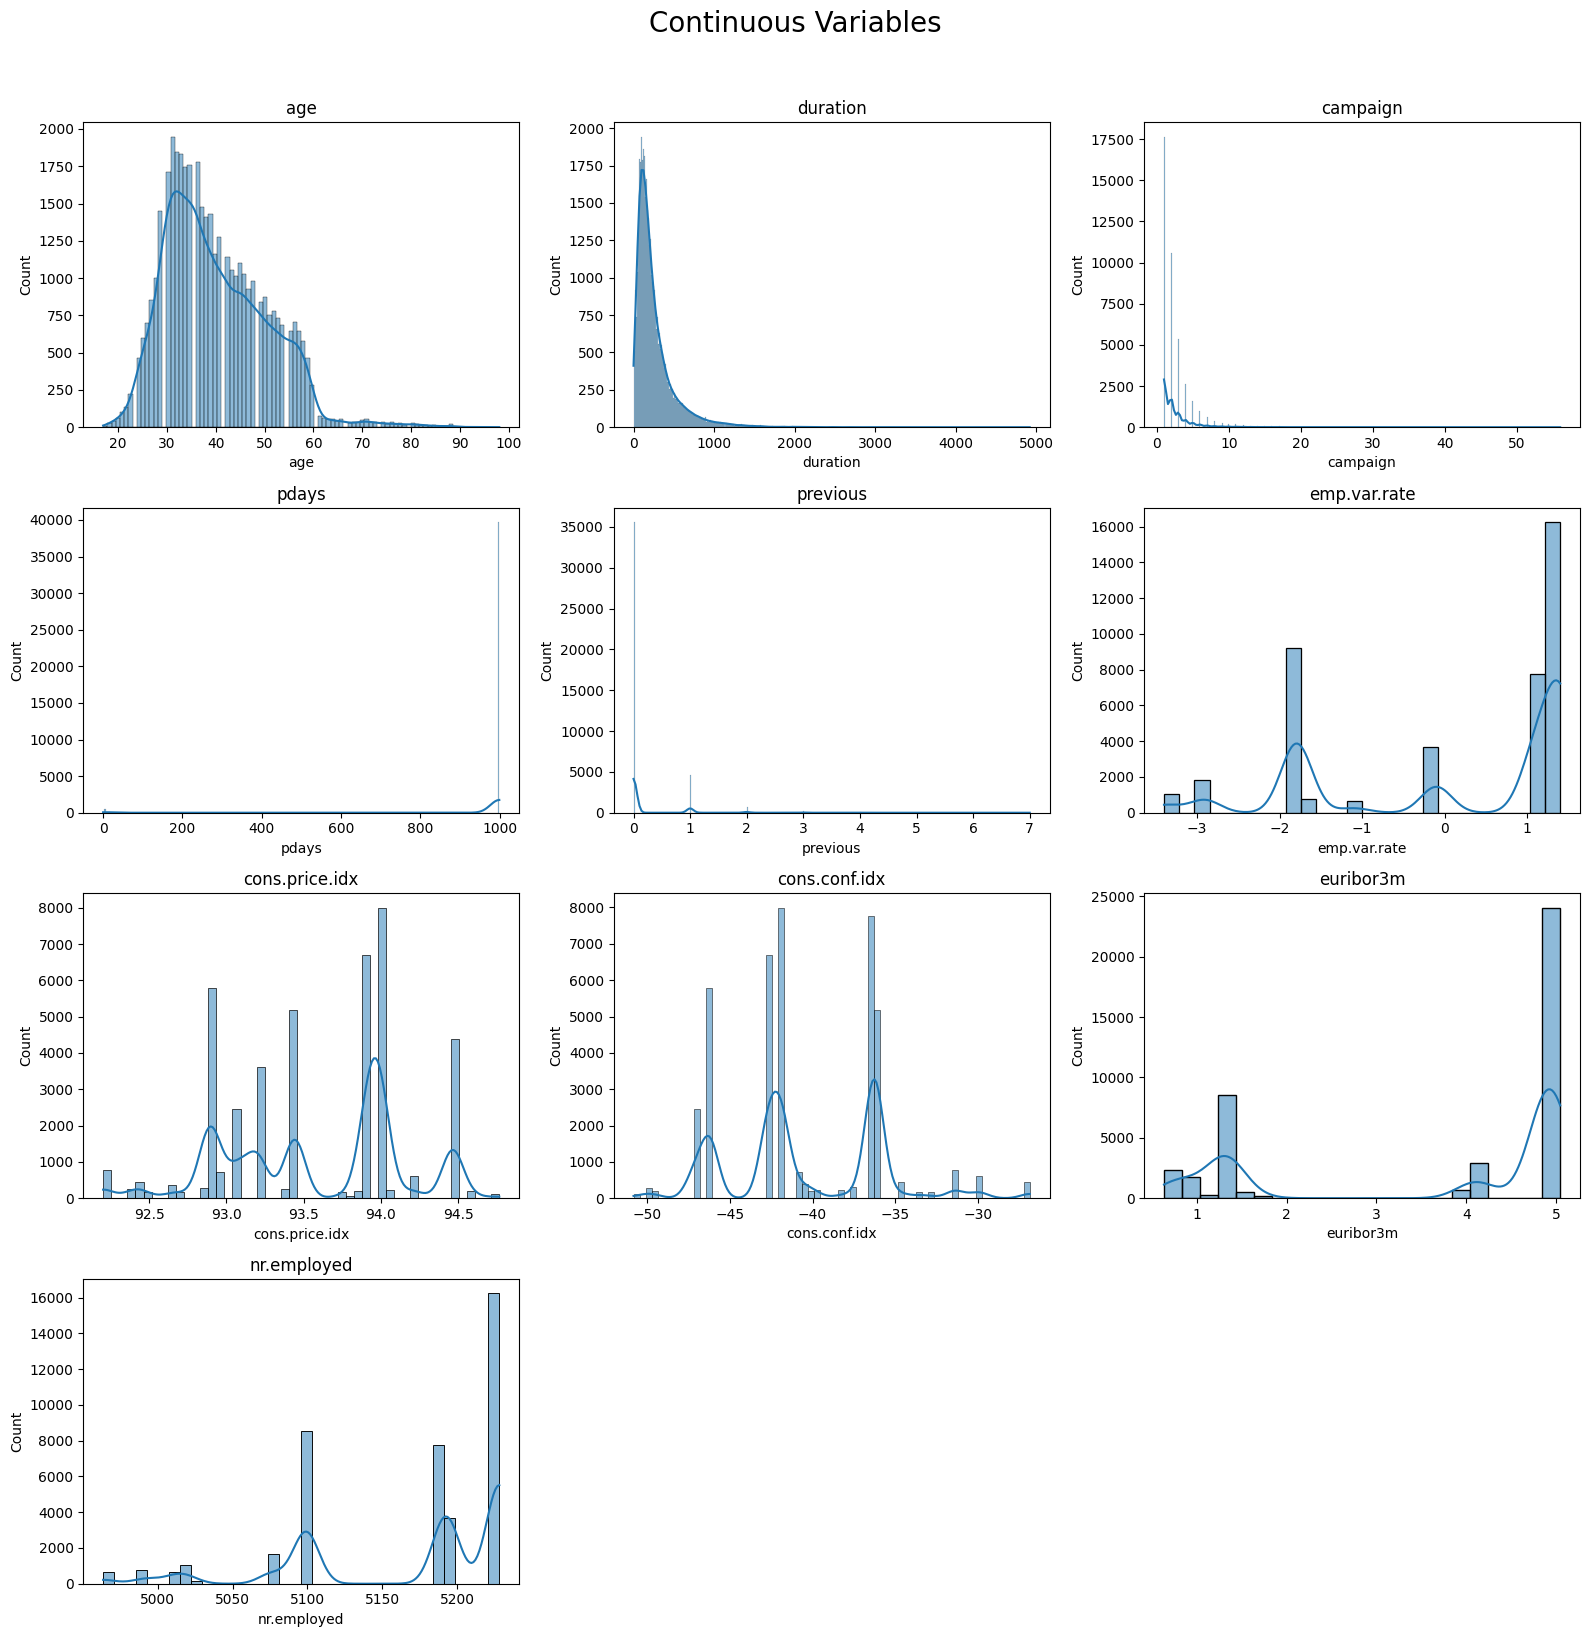

In [7]:
n = len(continous_vars) # number of categorical variables

cols = 3
rows = math.ceil(n / cols) # automatically determine rows and columns

plt.figure(figsize=(16, rows * 4))

plt.suptitle("Continuous Variables", fontsize=20, y=1.02)

for i, col in enumerate(continous_vars, start=1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Categorical Variables Visualization 



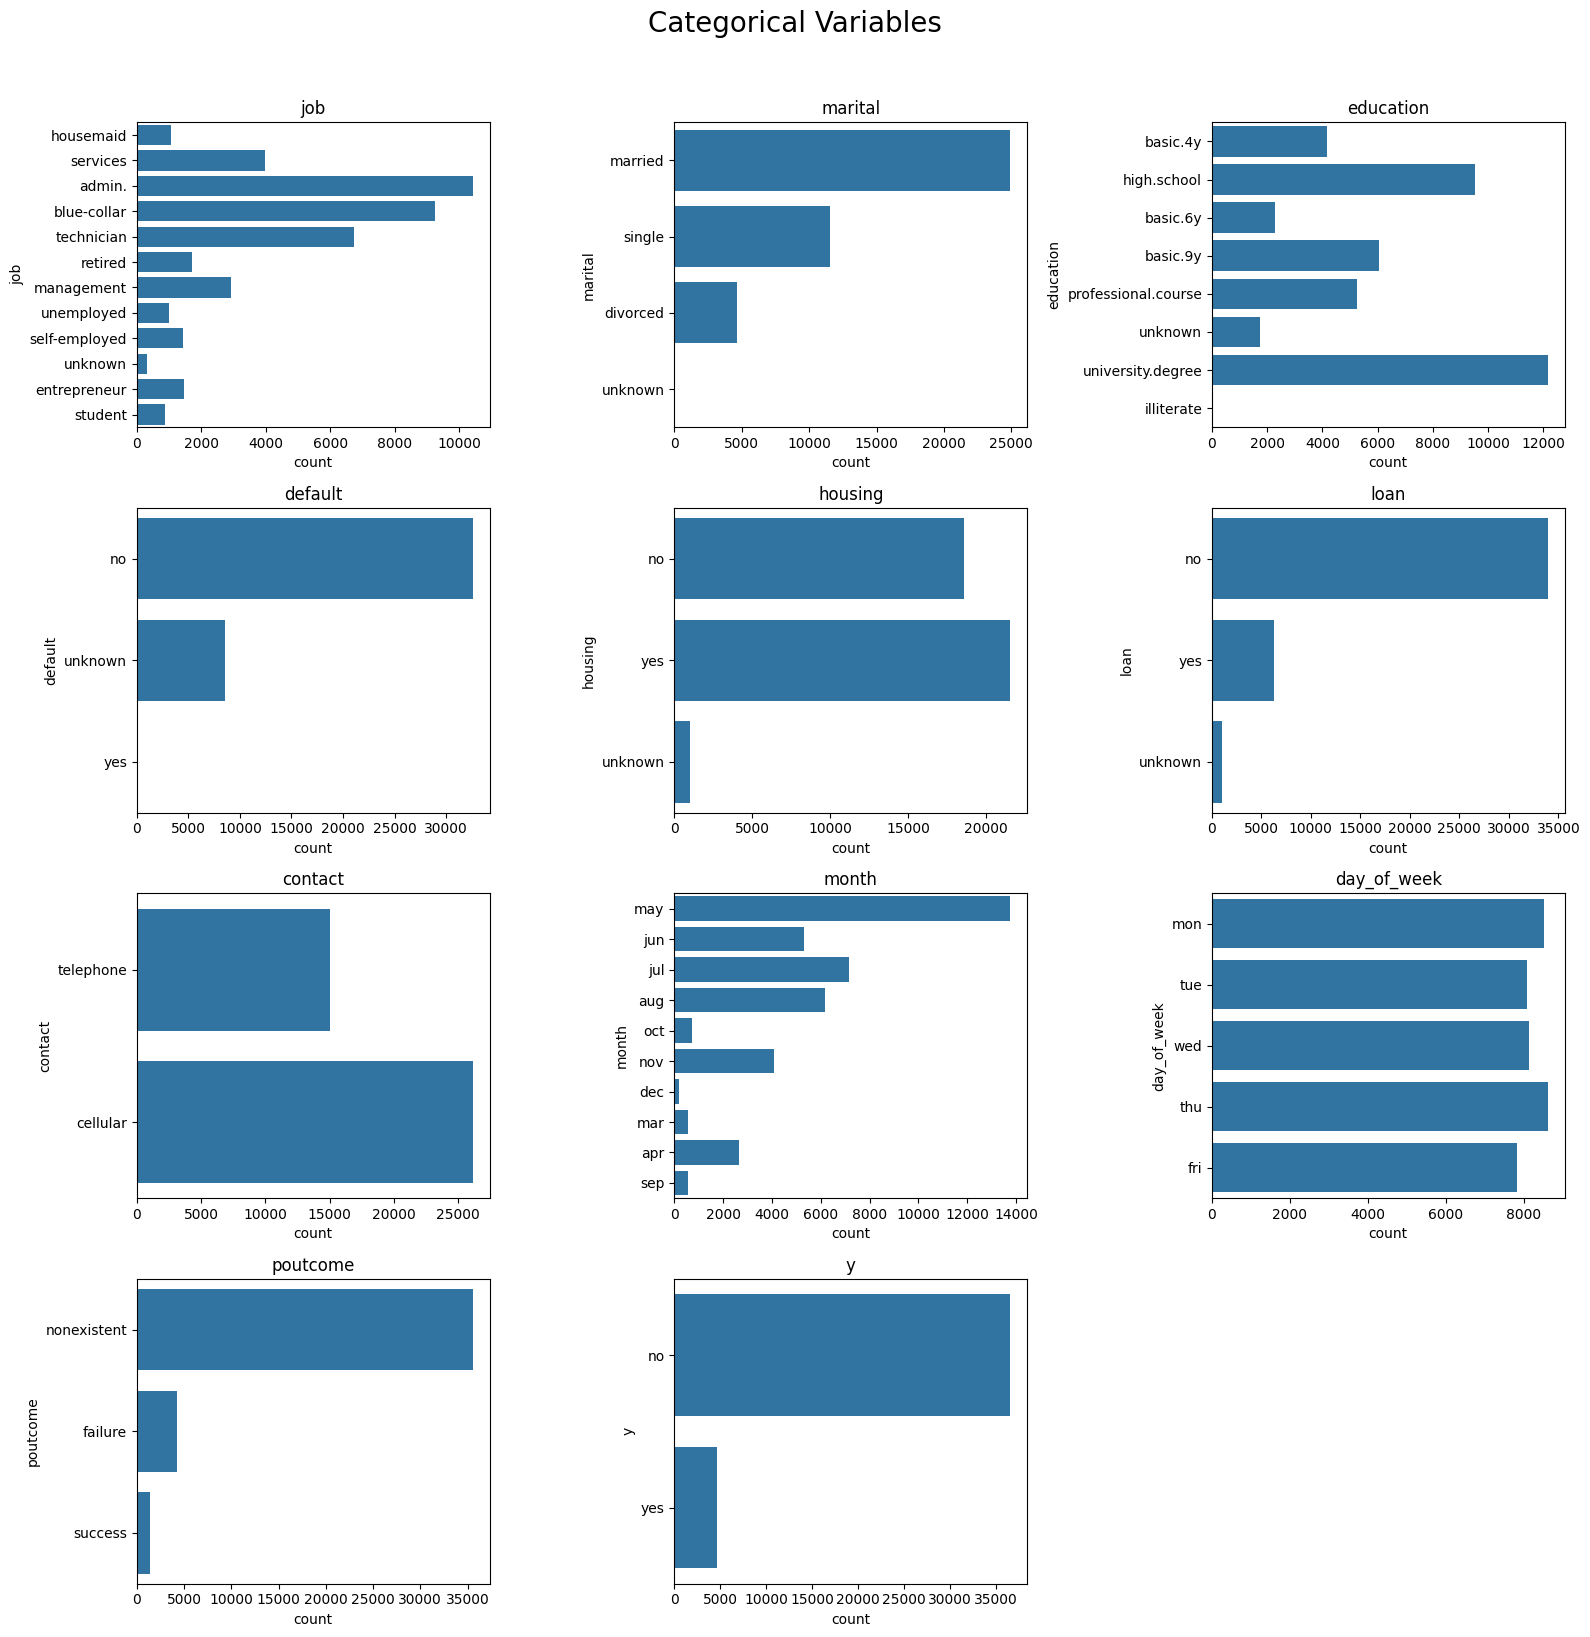

In [8]:
print("Categorical Variables Visualization","\n")
n = len(categorical_vars) # number of categorical variables

cols = 3
rows = math.ceil(n / cols) # automatically determine rows and columns

plt.figure(figsize=(16, rows * 4))

plt.suptitle("Categorical Variables", fontsize=20, y=1.02)

for i, col in enumerate(categorical_vars, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

### Test-Train Data Split

First step is spliting data into two and selected 80% of data as Training set and 20% of data as Test set.

Our dataset is imbalanced, it’s important to preserve the class proportions in both the training and test sets. 
We can do this using the stratify parameter in train_test_split.

In [9]:
X = df.drop('y', axis=1) #define feature matrix X and target vector y
y = df['y'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #checking the shape of the splits

(32950, 20) (8238, 20) (32950,) (8238,)


### Data Exploration

#### Correlation

Correlation Matrix



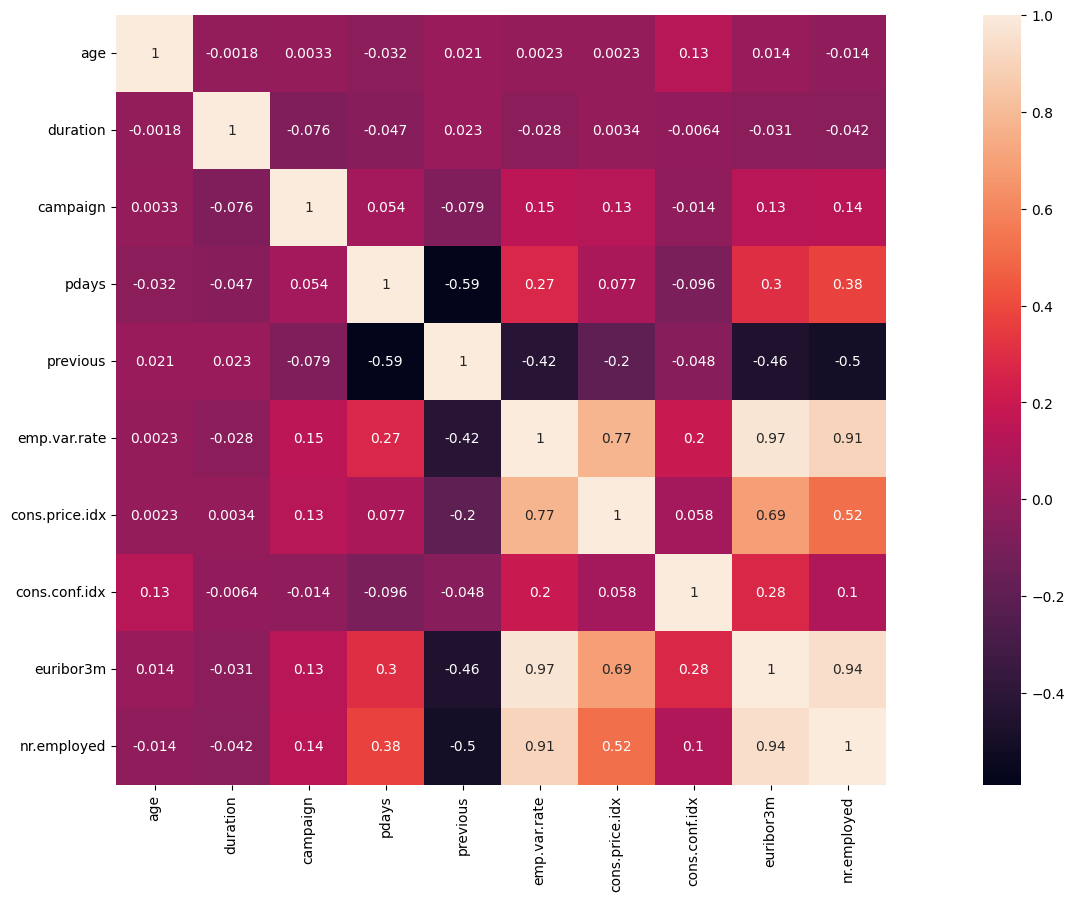

In [29]:
print("Correlation Matrix\n")

numeric_X = X_train.select_dtypes(include=['number'])   # keep only numeric columns
correlation = numeric_X.corr(method="pearson")

plt.figure(figsize=(25,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True)
plt.show()

We apply the Heatmap method to determin correlation between the continuous variables.

The heatmap showed very strong positive correlations (0.52 - 0.97) between these 4 veriables:
- cons.price.idx, 
- euribor3m, 
- nr.employed, 
- emp.var.rate.

When several features contain almost the same information, this creates: 
- Multicollinearity (Models (especially Logistic Regression) become unstable or overweight certain signals).
- Redundant information (Multiple features describe the same economic trend, adds noise and slows learning).
- Risk of overfitting (Model memorizes redundant patterns rather than learning true relationships).

In this case, those 4 economic indicators are closely related, they all describe economic health. 
When the economy changes, they all move together. So instead of 4 separate but highly correlated columns 
we apply Factor Analysis method and create 1 new feature: X_factor. 
This single factor captures most of the information from all 4 original variables.
After this process we dropped these columns.



### Preprosessing

In [30]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_to_drop = [
            "duration",        # must be removed (leakage)
            "cons.price.idx",
            "euribor3m",
            "nr.employed",
            "emp.var.rate"
        ]
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # X_factor = mean of the 4 correlated features
        X["X_factor"] = (
            X["cons.price.idx"] +
            X["euribor3m"] +
            X["nr.employed"] +
            X["emp.var.rate"]
        ) / 4

        # Drop original columns + duration
        X = X.drop(columns=self.cols_to_drop)

        return X

Data Normalization

The goal of normalization (or scaling) of numerical variables is to transform features so that they share a common scale, typically with a mean of zero and a standard deviation of one. Many machine-learning algorithms are sensitive to differences in feature magnitude because they rely on distance computations or gradient-based optimization. We use StandardScaler.

One-Hot Encoding

The goal of one-hot encoding is to transform categorical attributes into a numerical representation that is appropriate for machine-learning algorithms. Many supervised learning models—such as logistic regression, K-nearest neighbors, SVM, and neural networks—require numerical input and cannot operate directly on string-based categories.

#### Preprocessing Pipeline

In [ ]:
# Define numeric and categorical columns
numeric_cols = ["age", "campaign", "pdays", "previous", "cons.conf.idx", "X_factor"]
categorical_cols = ["job", "marital", "education", "default", "housing", 
                    "loan", "contact", "month", "day_of_week", "poutcome"]

# Create preprocessing pipeline

preprocess_pipeline = Pipeline([
    ("feature_creator", FeatureCreator()),       # create X_factor + drop columns
    ("preprocessor", ColumnTransformer([
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]))
])

### Modeling

Logistic Regression

In [32]:
lr_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("model", LogisticRegression(max_iter=500))
])
lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('feature_creator', ...), ('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3


K Nearest Neighbors

In [36]:
knn_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),           
    ("model", KNeighborsClassifier(n_neighbors=10))  
])
knn_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('feature_creator', ...), ('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3


Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('feature_creator', ...), ('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
